In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
import matplotlib.cm as cm  #https://matplotlib.org/api/cm_api.html

# Decision making with Matrices

# This is a pretty simple assingment.  You will do something you do everyday, but today it will be with matrix manipulations.

# The problem is: you and your work firends are trying to decide where to go for lunch. You have to pick a resturant thats best for everyone.  
# Then you should decided if you should split into two groups so eveyone is happier.

# Displicte the simplictiy of the process you will need to make decisions regarding how to process the data.

# This process was thoughly investigated in the operation research community.  This approah can prove helpful on any number of 
# decsion making problems that are currently not leveraging machine learning.


In [3]:
#Original People Dict
people = {'Jane': {'willingness to travel': 0.1596993,
                  'desire for new experience':0.67131344,
                  'cost':0.15006726,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.01892,
                  },
          'Bob': {'willingness to travel': 0.63124581,
                  'desire for new experience':0.20269888,
                  'cost':0.01354308,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.15251223,
                  },
          'Mary': {'willingness to travel': 0.49337138 ,
                  'desire for new experience': 0.41879654,
                  'cost': 0.05525843,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.03257365,
                  },
          'Mike': {'willingness to travel': 0.08936756,
                  'desire for new experience': 0.14813813,
                  'cost': 0.43602425,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.32647006,
                  },
          'Alice': {'willingness to travel': 0.05846052,
                  'desire for new experience': 0.6550466,
                  'cost': 0.1020457,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.18444717,
                  },
          'Skip': {'willingness to travel': 0.08534087,
                  'desire for new experience': 0.20286902,
                  'cost': 0.49978215,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.21200796,
                  },
          'Kira': {'willingness to travel': 0.14621567,
                  'desire for new experience': 0.08325185,
                  'cost': 0.59864525,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.17188723,
                  },
          'Moe': {'willingness to travel': 0.05101531,
                  'desire for new experience': 0.03976796,
                  'cost': 0.06372092,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.84549581,
                  },
          'Sara': {'willingness to travel': 0.18780828,
                  'desire for new experience': 0.59094026,
                  'cost': 0.08490399,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.13634747,
                  },
          'Tom': {'willingness to travel': 0.77606127,
                  'desire for new experience': 0.06586204,
                  'cost': 0.14484121,
                  #'indian food':1,
                  #'Mexican food':1,
                  #'hipster points':3,
                  'vegetarian': 0.01323548,
                  }                  
          }


In [5]:
#Transform the user data into a matrix(M_people). Keep track of column and row ids.

                                       # convert each person's values to a list

peopleKeys, peopleValues = [], []
lastKey = 0
for k1, v1 in people.items():
    row = []
    
    for k2, v2 in v1.items():
        peopleKeys.append(k1+'_'+k2)
        if k1 == lastKey:
            row.append(v2)      
            lastKey = k1
            
        else:
            peopleValues.append(row)
            row.append(v2)   
            lastKey = k1
            

#here are some lists that show column keys and values
print(peopleKeys)
print(peopleValues)



peopleMatrix = np.array(peopleValues)

peopleMatrix.shape


['Jane_willingness to travel', 'Jane_desire for new experience', 'Jane_cost', 'Jane_vegetarian', 'Bob_willingness to travel', 'Bob_desire for new experience', 'Bob_cost', 'Bob_vegetarian', 'Mary_willingness to travel', 'Mary_desire for new experience', 'Mary_cost', 'Mary_vegetarian', 'Mike_willingness to travel', 'Mike_desire for new experience', 'Mike_cost', 'Mike_vegetarian', 'Alice_willingness to travel', 'Alice_desire for new experience', 'Alice_cost', 'Alice_vegetarian', 'Skip_willingness to travel', 'Skip_desire for new experience', 'Skip_cost', 'Skip_vegetarian', 'Kira_willingness to travel', 'Kira_desire for new experience', 'Kira_cost', 'Kira_vegetarian', 'Moe_willingness to travel', 'Moe_desire for new experience', 'Moe_cost', 'Moe_vegetarian', 'Sara_willingness to travel', 'Sara_desire for new experience', 'Sara_cost', 'Sara_vegetarian', 'Tom_willingness to travel', 'Tom_desire for new experience', 'Tom_cost', 'Tom_vegetarian']
[[0.1596993, 0.67131344, 0.15006726, 0.01892], 

(10, 4)

In [7]:
# Original Restaurants dict
restaurants  = {'flacos':{'distance' : 2,
                        'novelty' : 3,
                        'cost': 4,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 5
                        },
              'Joes':{'distance' : 5,
                        'novelty' : 1,
                        'cost': 5,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 3
                      },
              'Poke':{'distance' : 4,
                        'novelty' : 2,
                        'cost': 4,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 4
                      },                      
              'Sush-shi':{'distance' : 4,
                        'novelty' : 3,
                        'cost': 4,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 4
                      },
              'Chick Fillet':{'distance' : 3,
                        'novelty' : 2,
                        'cost': 5,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 5
                      },
              'Mackie Des':{'distance' : 2,
                        'novelty' : 3,
                        'cost': 4,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 3
                      },
              'Michaels':{'distance' : 2,
                        'novelty' : 1,
                        'cost': 1,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 5
                      },
              'Amaze':{'distance' : 3,
                        'novelty' : 5,
                        'cost': 2,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 4
                      },
              'Kappa':{'distance' : 5,
                        'novelty' : 1,
                        'cost': 2,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 3
                      },
              'Mu':{'distance' : 3,
                        'novelty' : 1,
                        'cost': 5,
                        #'average rating': 5,
                        #'cuisine': 5,
                        'vegetarian': 3
                      }                      
}



In [8]:
# Transform the restaurant data into a matrix(M_resturants) use the same column index.

restaurantsKeys, restaurantsValues = [], []

for k1, v1 in restaurants.items():
    for k2, v2 in v1.items():
        restaurantsKeys.append(k1+'_'+k2)
        restaurantsValues.append(v2)

#here are some lists that show column keys and values
print(restaurantsKeys)
print(restaurantsValues)

len(restaurantsValues)
#reshape to 2 rows and 4 columns

#converting lists to np.arrays is easy
# restaurantsMatrix = np.reshape(restaurantsValues, (10,6))
#TODO CHANGE HERE
restaurantsMatrix = np.reshape(restaurantsValues, (10,4))


restaurantsMatrix

restaurantsMatrix.shape

# Matrix multiplication
# Dot products are the matrix multiplication of a row vectors and column vectors (n,p) * (p,n)
#  shape example: ( 2 X 4 ) * (4 X 2) = 2 * 2
a = np.array([[1, 0], [0, 1]])
b = np.array([[1],[2]])

a.shape, b.shape

# when 2D arrays are involved, np.dot give the matrix product.
np.dot(a,b)

# documentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
# intuition: https://www.mathsisfun.com/algebra/matrix-multiplying.html
c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([[7,8],[9,10],[11,12]])

c.shape, d.shape

np.dot(c,d)
# What is a matrix product?
# https://en.wikipedia.org/wiki/Matrix_multiplication
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul
# matmul give the matrix product, too.
np.matmul(a,b)


restaurantsMatrix.shape, peopleMatrix.shape

['flacos_distance', 'flacos_novelty', 'flacos_cost', 'flacos_vegetarian', 'Joes_distance', 'Joes_novelty', 'Joes_cost', 'Joes_vegetarian', 'Poke_distance', 'Poke_novelty', 'Poke_cost', 'Poke_vegetarian', 'Sush-shi_distance', 'Sush-shi_novelty', 'Sush-shi_cost', 'Sush-shi_vegetarian', 'Chick Fillet_distance', 'Chick Fillet_novelty', 'Chick Fillet_cost', 'Chick Fillet_vegetarian', 'Mackie Des_distance', 'Mackie Des_novelty', 'Mackie Des_cost', 'Mackie Des_vegetarian', 'Michaels_distance', 'Michaels_novelty', 'Michaels_cost', 'Michaels_vegetarian', 'Amaze_distance', 'Amaze_novelty', 'Amaze_cost', 'Amaze_vegetarian', 'Kappa_distance', 'Kappa_novelty', 'Kappa_cost', 'Kappa_vegetarian', 'Mu_distance', 'Mu_novelty', 'Mu_cost', 'Mu_vegetarian']
[2, 3, 4, 5, 5, 1, 5, 3, 4, 2, 4, 4, 4, 3, 4, 4, 3, 2, 5, 5, 2, 3, 4, 3, 2, 1, 1, 5, 3, 5, 2, 4, 5, 1, 2, 3, 3, 1, 5, 3]


((10, 4), (10, 4))

In [9]:
# Choose a person and compute(using a linear combination) the top restaurant for them.  
# What does each entry in the resulting vector represent?

print(peopleKeys)
print(peopleValues)

print(restaurantsKeys)
print(restaurantsValues)


restaurantsMatrix.shape, peopleMatrix.shape

['Jane_willingness to travel', 'Jane_desire for new experience', 'Jane_cost', 'Jane_vegetarian', 'Bob_willingness to travel', 'Bob_desire for new experience', 'Bob_cost', 'Bob_vegetarian', 'Mary_willingness to travel', 'Mary_desire for new experience', 'Mary_cost', 'Mary_vegetarian', 'Mike_willingness to travel', 'Mike_desire for new experience', 'Mike_cost', 'Mike_vegetarian', 'Alice_willingness to travel', 'Alice_desire for new experience', 'Alice_cost', 'Alice_vegetarian', 'Skip_willingness to travel', 'Skip_desire for new experience', 'Skip_cost', 'Skip_vegetarian', 'Kira_willingness to travel', 'Kira_desire for new experience', 'Kira_cost', 'Kira_vegetarian', 'Moe_willingness to travel', 'Moe_desire for new experience', 'Moe_cost', 'Moe_vegetarian', 'Sara_willingness to travel', 'Sara_desire for new experience', 'Sara_cost', 'Sara_vegetarian', 'Tom_willingness to travel', 'Tom_desire for new experience', 'Tom_cost', 'Tom_vegetarian']
[[0.1596993, 0.67131344, 0.15006726, 0.01892], 

((10, 4), (10, 4))

In [10]:
#We need to swap axis on peopleMatrix
#newPeopleMatrix = np.swapaxes(peopleMatrix, 1, 0)

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.swapaxes.html
newPeopleMatrix = np.swapaxes(peopleMatrix, 0, 1)

newPeopleMatrix.shape, restaurantsMatrix.shape
restaurantsMatrix.shape, newPeopleMatrix.shape

# Next compute a new matrix (M_usr_x_rest  i.e. an user by restaurant) from all people.  What does the a_ij matrix represent?
#Let's check our answers

results = np.matmul(restaurantsMatrix, newPeopleMatrix)

results                             


# Sum all columns in M_usr_x_rest to get optimal restaurant for all users.  What do the entry’s represent?
# I believe that this is what John and  is asking for, sum by columns
np.sum(results, axis=1)

restaurantsKeys

# Now convert each row in the M_usr_x_rest into a ranking for each user and call it M_usr_x_rest_rank.   
# Do the same as above to generate the optimal resturant choice.
results


array([[3.02820796, 2.68732173, 2.62703435, 3.99959681, 3.41247949,
        3.8384572 , 3.79620404, 4.70369723, 3.16979065, 2.3952509 ],
       [2.27690624, 3.88418002, 3.25966654, 3.75450736, 2.01091921,
        3.764508  , 4.32321814, 3.14993654, 2.36354402, 4.71008088],
       [2.65737312, 3.59460224, 3.16240692, 3.70372374, 2.68990676,
        3.59426196, 3.8334963 , 3.92046408, 2.81811948, 3.86827592],
       [3.32868656, 3.79730112, 3.58120346, 3.85186187, 3.34495336,
        3.79713098, 3.91674815, 3.96023204, 3.40905974, 3.93413796],
       [2.66666108, 3.12941174, 2.75686762, 4.37685049, 2.91793911,
        4.2207112 , 4.45781311, 4.7786655 , 2.85156266, 3.25029134],
       [2.99036796, 2.38229727, 2.56188705, 3.34665669, 3.04358515,
        3.41444128, 3.45242958, 3.01270561, 2.89709571, 2.36877994],
       [1.2353793 , 2.24129473, 1.62366598, 2.3952478 , 1.79624919,
        1.93337271, 1.83376459, 4.43299855, 1.73319816, 1.82900319],
       [4.21147962, 3.54436691, 3.8149083

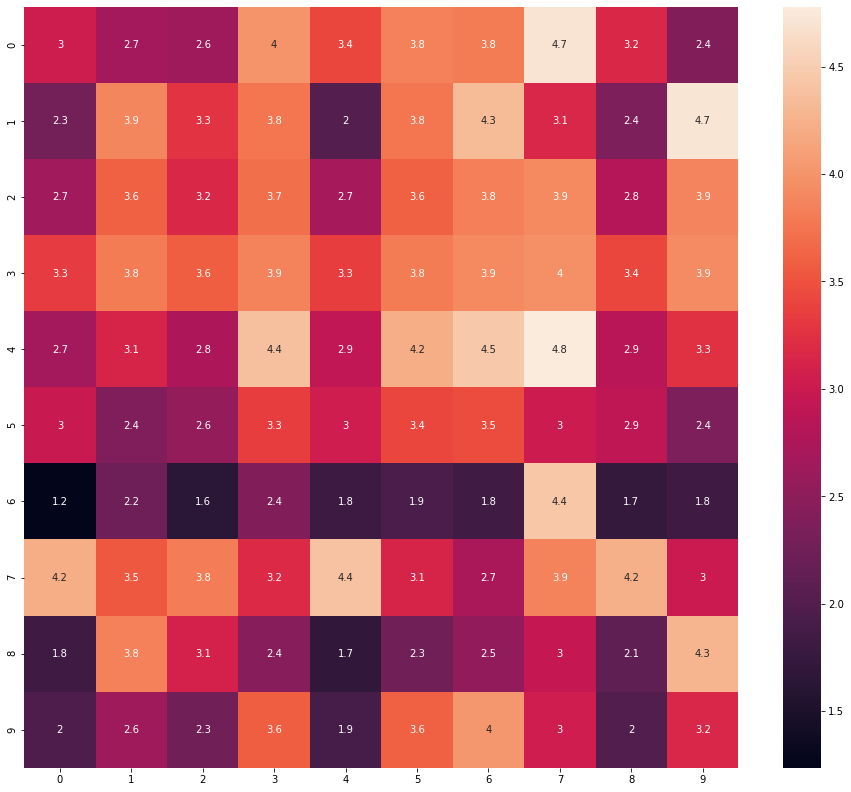

['Jane_willingness to travel', 'Jane_desire for new experience', 'Jane_cost', 'Jane_vegetarian', 'Bob_willingness to travel', 'Bob_desire for new experience', 'Bob_cost', 'Bob_vegetarian', 'Mary_willingness to travel', 'Mary_desire for new experience', 'Mary_cost', 'Mary_vegetarian', 'Mike_willingness to travel', 'Mike_desire for new experience', 'Mike_cost', 'Mike_vegetarian', 'Alice_willingness to travel', 'Alice_desire for new experience', 'Alice_cost', 'Alice_vegetarian', 'Skip_willingness to travel', 'Skip_desire for new experience', 'Skip_cost', 'Skip_vegetarian', 'Kira_willingness to travel', 'Kira_desire for new experience', 'Kira_cost', 'Kira_vegetarian', 'Moe_willingness to travel', 'Moe_desire for new experience', 'Moe_cost', 'Moe_vegetarian', 'Sara_willingness to travel', 'Sara_desire for new experience', 'Sara_cost', 'Sara_vegetarian', 'Tom_willingness to travel', 'Tom_desire for new experience', 'Tom_cost', 'Tom_vegetarian']
['flacos_distance', 'flacos_novelty', 'flacos_c

(10, 4)

In [11]:
# Say that rank 1 is best

#reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# Argsort returns the indices that would sort an array - https://stackoverflow.com/questions/17901218/numpy-argsort-what-is-it-doing
# By default, argsort is in ascending order, but below, we make it in descending order and then add 1 since ranks start at 1
sortedResults = results.argsort()[::-1] + 1
sortedResults

#What is the problem here? 

results.shape

#first plot heatmap
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
plot_dims = (16,14)
fig, ax = plt.subplots(figsize=plot_dims)
sns.heatmap(ax=ax, data=results, annot=True)
plt.show()

#remember a_ij is the score for a restaurant for a person
#x is the person, y is the restaurant

print(peopleKeys)
#x=0 (Jane), x=1 (Bob), x=2 (Mary), x=3 (Mike), x=4 (Alice), 
#x=5 (Skip), x=6 (Kira), x=7 (Moe), x=8 (Sara), x=9 (Tom)

print(restaurantsKeys)
#y=0 (flacos), y=1 (Joes), y=2 (Poke), y=3 (Sush-shi), y=4 (Chick Fillet),
#y=5 (Mackie Des), y=6 (Michaels), y=7 (Amaze), y=8 (Kappa), y=9 (Mu)
 
#What is the problem if we want to do clustering with this matrix?


results.shape 

#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA


peopleMatrix.shape


In [12]:
#we don't need to apply standard scaler since the data is already scaled
#sc = StandardScaler()  
#peopleMatrixScaled = sc.fit_transform(peopleMatrix)  

#The example PCA was taken from.
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
pca = PCA(n_components=2)  
peopleMatrixPcaTransform = pca.fit_transform(peopleMatrix)  

print(pca.components_)
print(pca.explained_variance_)


[[-0.61476326 -0.34909596  0.34835223  0.61550699]
 [ 0.60185558 -0.78716301  0.07057613  0.1147313 ]]
[0.10600455 0.08130269]


[[-0.33556725  0.25550907]
 [ 0.34846808  0.07744533]
 [-0.12905686 -0.35876951]]
[2 0 0 1 2 1 1 1 2 0]
coordinate: [-0.20019903 -0.37761401] label: 2
coordinate: [-0.2918286  0.2807568] label: 0
coordinate: [-0.34179869  0.01685562] label: 0
coordinate: [0.3145897  0.04734805] label: 1
coordinate: [-0.04712775 -0.41013851] label: 2
coordinate: [ 0.24971681 -0.00679017] label: 1
coordinate: [0.26379568 0.12638015] label: 1
coordinate: [0.56577012 0.14284329] label: 1
coordinate: [-0.13984379 -0.28855603] label: 2
coordinate: [-0.37307445  0.4689148 ] label: 0


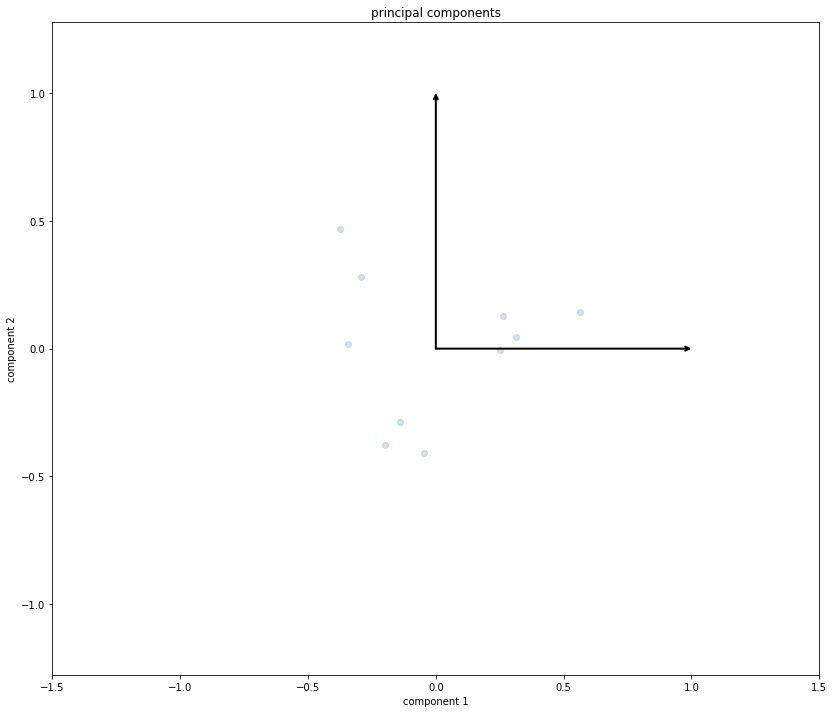

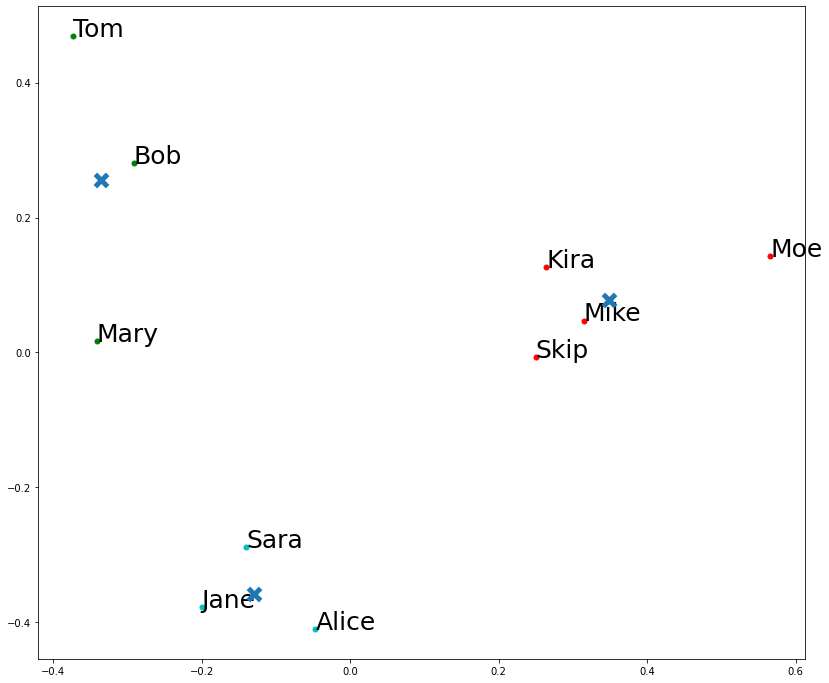

In [14]:

#This function was shamefully taken from the below and modified for our purposes
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
# plot principal components
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax.scatter(peopleMatrixPcaTransform[:, 0], peopleMatrixPcaTransform[:, 1], alpha=0.2)
#ax.scatter(peopleMatrix[:, 0], peopleMatrix[:, 1], alpha=0.2)

draw_vector([0, 0], [0, 1], ax=ax)
draw_vector([0, 0], [1, 0], ax=ax)
ax.axis('equal')
ax.set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
fig.show



# Now use peoplePCA for clustering and plotting
# https://scikit-learn.org/stable/modules/clustering.html 
kmeans = KMeans(n_clusters=3)
kmeans.fit(peopleMatrixPcaTransform)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print (centroid)
print(labels)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

#https://matplotlib.org/users/colors.html
colors = ["g.","r.","c."]
labelList = ['Jane', 'Bob', 'Mary', 'Mike', 'Alice', 'Skip', 'Kira', 'Moe', 'Sara', 'Tom']

for i in range(len(peopleMatrixPcaTransform)):
   print ("coordinate:" , peopleMatrixPcaTransform[i], "label:", labels[i])
   ax.plot(peopleMatrixPcaTransform[i][0],peopleMatrixPcaTransform[i][1],colors[labels[i]],markersize=10)
   #https://matplotlib.org/users/annotations_intro.html
   #https://matplotlib.org/users/text_intro.html
   ax.annotate(labelList[i], (peopleMatrixPcaTransform[i][0],peopleMatrixPcaTransform[i][1]), size=25)
ax.scatter(centroid[:,0],centroid[:,1], marker = "x", s=150, linewidths = 5, zorder =10)

plt.show()

[[-0.47607721  0.55061787 -0.61585618  0.30148236]
 [ 0.33139822 -0.52779306 -0.77592084 -0.09775767]]
[2.58250059 1.74016953]
[[ 1.4621574  -0.89731165]
 [-1.10429017 -0.38932873]
 [ 0.56748934  2.3192893 ]]
[0 1 1 1 1 0 2 0 2 1]
coordinate: [ 1.14468279 -1.27095391] label: 0
coordinate: [-2.60360548  0.19842138] label: 1
coordinate: [-0.65957186  0.01739327] label: 1
coordinate: [-0.10895399 -0.51039979] label: 1
coordinate: [-0.49786847 -1.18768346] label: 1
coordinate: [ 0.54171807 -1.07543856] label: 0
coordinate: [1.89101561 2.11239472] label: 2
coordinate: [ 2.70007132 -0.34554246] label: 0
coordinate: [-0.75603693  2.52618389] label: 2
coordinate: [-1.65145106 -0.46437506] label: 1


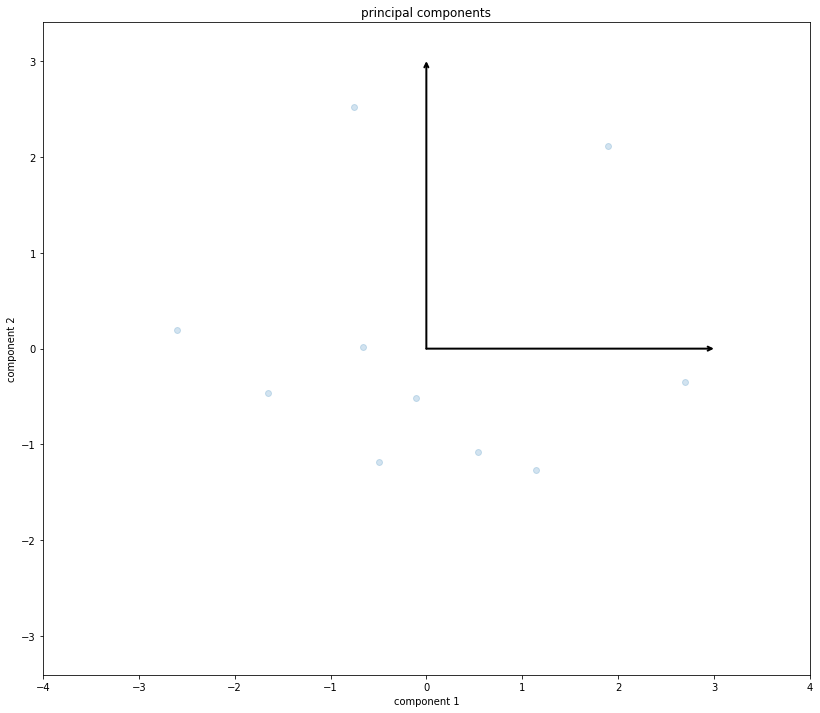

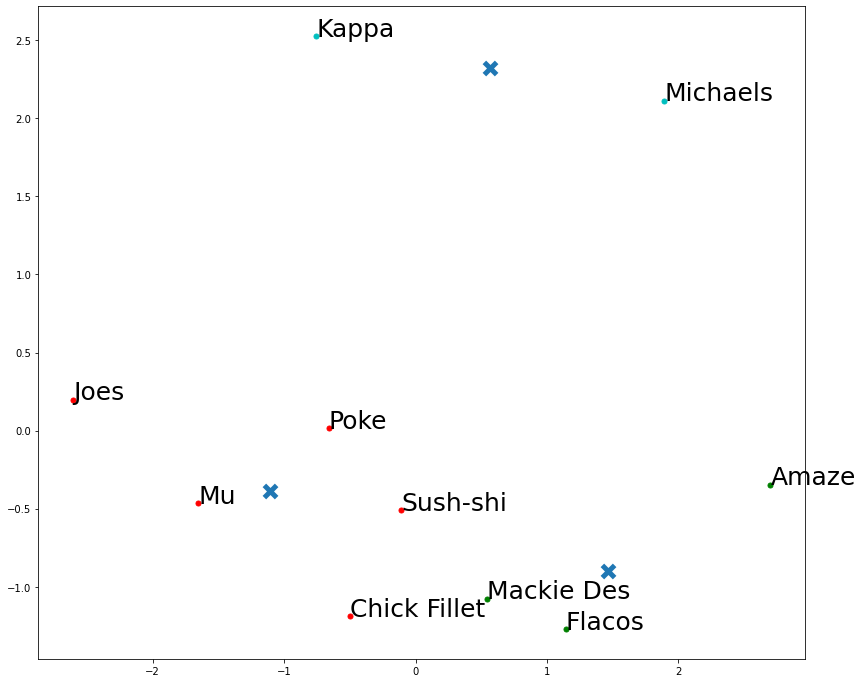

In [18]:
restaurantsMatrix.shape

pca = PCA(n_components=2)  
restaurantsMatrixPcaTransform = pca.fit_transform(restaurantsMatrix)  

print(pca.components_)
print(pca.explained_variance_)


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax.scatter(restaurantsMatrixPcaTransform[:, 0], restaurantsMatrixPcaTransform[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax)
draw_vector([0, 0], [3, 0], ax=ax)
ax.axis('equal')
ax.set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-4, 4), ylim=(-4, 4))
fig.show
# Now use restaurantsMatrixPcaTransform for plotting 
# https://scikit-learn.org/stable/modules/clustering.html
kmeans = KMeans(n_clusters=3)
kmeans.fit(restaurantsMatrixPcaTransform)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print (centroid)
print(labels)


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
#https://matplotlib.org/users/colors.html
colors = ["g.","r.","c."]
labelList = ['Flacos', 'Joes', 'Poke', 'Sush-shi', 'Chick Fillet', 'Mackie Des', 'Michaels', 'Amaze', 'Kappa', 'Mu']

for i in range(len(restaurantsMatrixPcaTransform)):
   print ("coordinate:" , restaurantsMatrixPcaTransform[i], "label:", labels[i])
   ax.plot(restaurantsMatrixPcaTransform[i][0],restaurantsMatrixPcaTransform[i][1],colors[labels[i]],markersize=10)
   #https://matplotlib.org/users/annotations_intro.html
   #https://matplotlib.org/users/text_intro.html
   ax.annotate(labelList[i], (restaurantsMatrixPcaTransform[i][0],restaurantsMatrixPcaTransform[i][1]), size=25)
ax.scatter(centroid[:,0],centroid[:,1], marker = "x", s=150, linewidths = 5, zorder =10)

plt.show()

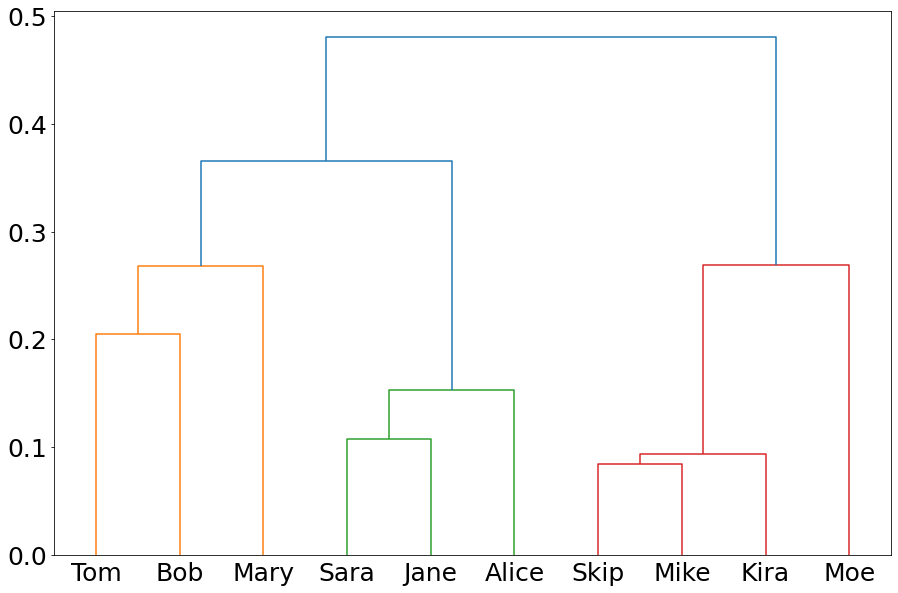

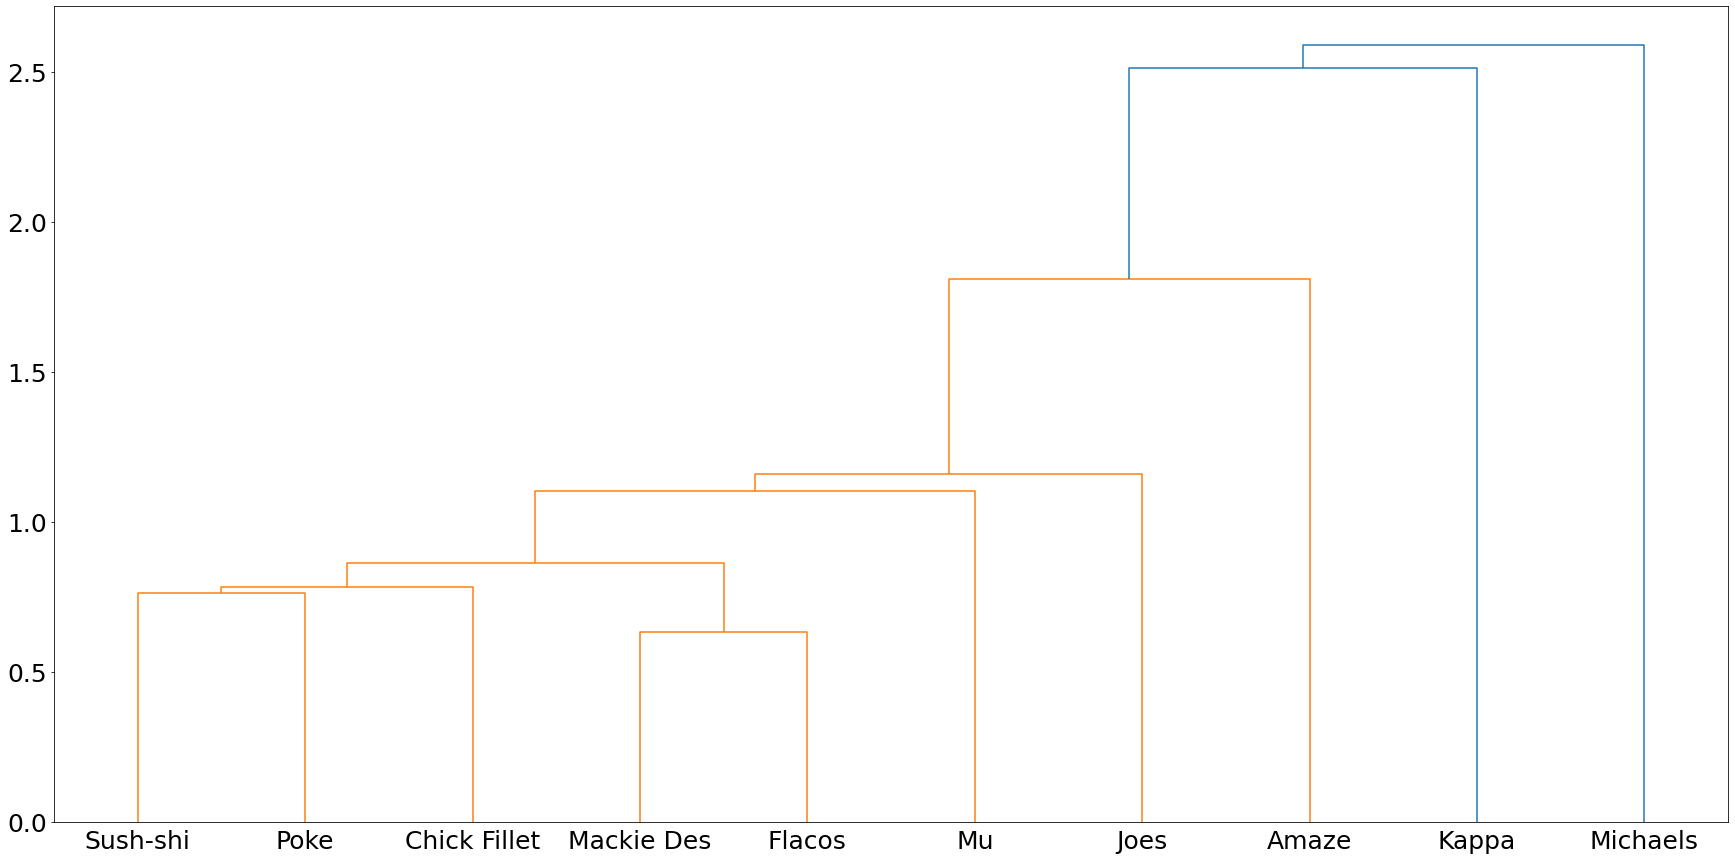

In [19]:
pca = PCA(n_components=2)  
peopleMatrixPcaTransform = pca.fit_transform(peopleMatrix)  

#Now lets try heirarchical clustering
linked = linkage(peopleMatrixPcaTransform, 'single')

#x=0 (Jane), x=1 (Bob), x=2 (Mary), x=3 (Mike), x=4 (Alice), 
#x=5 (Skip), x=6 (Kira), x=7 (Moe), x=8 (Sara), x=9 (Tom)

labelList = ['Jane', 'Bob', 'Mary', 'Mike', 'Alice', 'Skip', 'Kira', 'Moe', 'Sara', 'Tom']

# explicit interface
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=25)
ax.tick_params(axis='y', which='major', labelsize=25)
plt.show()  




#Now do the same for restaurants
pca = PCA(n_components=2)  
restaurantsMatrixPcaTransform = pca.fit_transform(restaurantsMatrix)  


#Now lets try heirarchical clustering
linked = linkage(restaurantsMatrixPcaTransform, 'single')


#y=0 (flacos), y=1 (Joes), y=2 (Poke), y=3 (Sush-shi), y=4 (Chick Fillet),
#y=5 (Mackie Des), y=6 (Michaels), y=7 (Amaze), y=8 (Kappa), y=9 (Mu)

labelList = ['Flacos', 'Joes', 'Poke', 'Sush-shi', 'Chick Fillet', 'Mackie Des', 'Michaels', 'Amaze', 'Kappa', 'Mu']

fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1, 1, 1)
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=25)
ax.tick_params(axis='y', which='major', labelsize=25)
plt.show()  





For n_clusters = 2 

The average silhouette_score is : 0.4669553573440674 

* The silhouette score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
* Scores around zero indicate overlapping clusters. 
* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster 

The individual silhouette scores were : [0.38165051 0.27319044 0.41720102 0.77239688 0.20978149 0.68025837
 0.72084981 0.65623607 0.34466295 0.21332603] 

And their assigned clusters were : [0 0 0 1 0 1 1 1 0 0] 

Which correspond to : 'Jane', 'Bob', 'Mary', 'Mike', 'Alice', 'Skip', 'Kira', 'Moe', 'Sara', and 'Tom'



For n_clusters = 3 

The average silhouette_score is : 0.6494955988283129 

* The silhouette score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
* Scores around zero indicate overlapping clusters. 
* The score is higher when clusters are dense and well separated, which relates to a sta

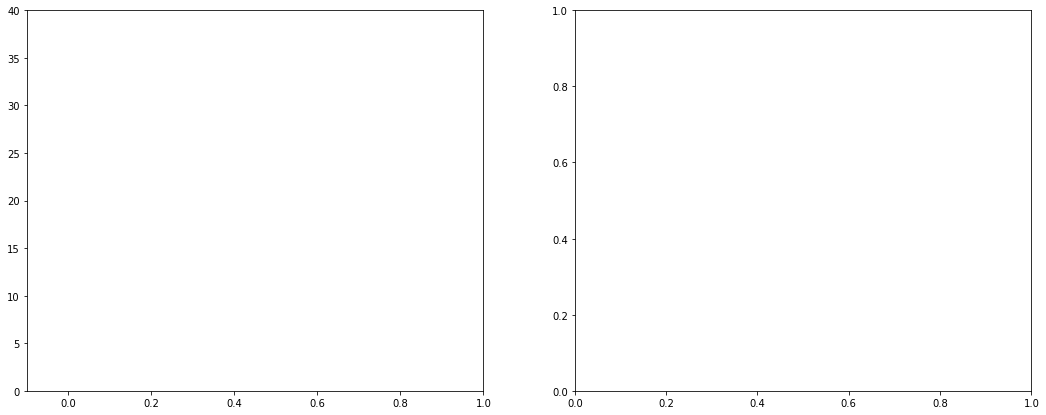

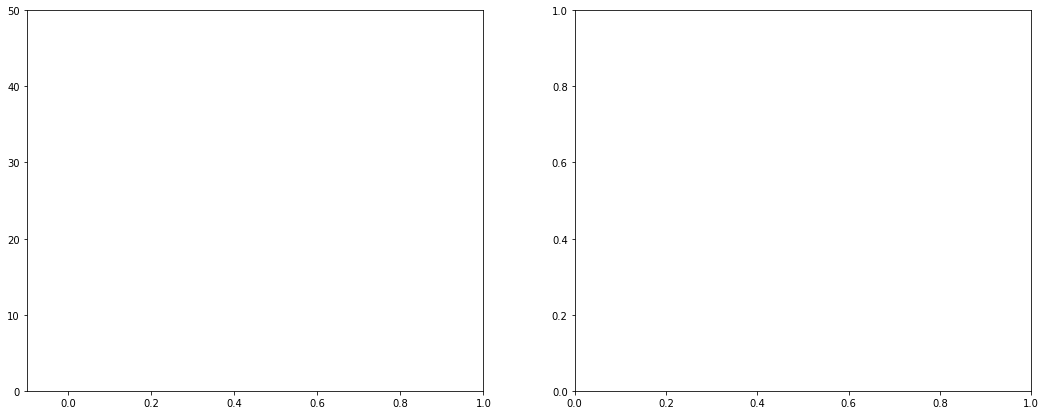

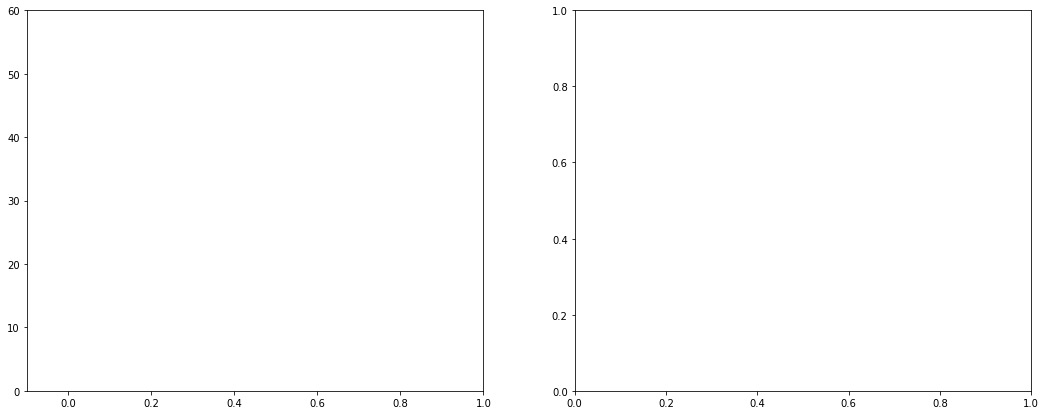

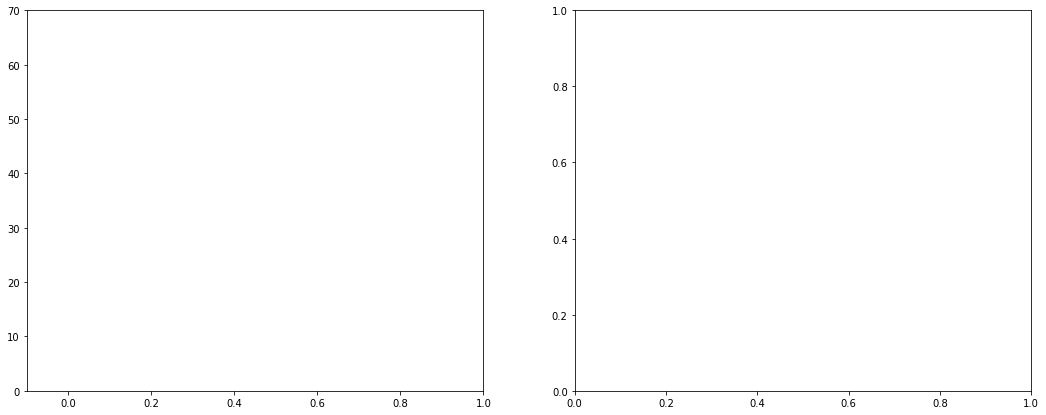

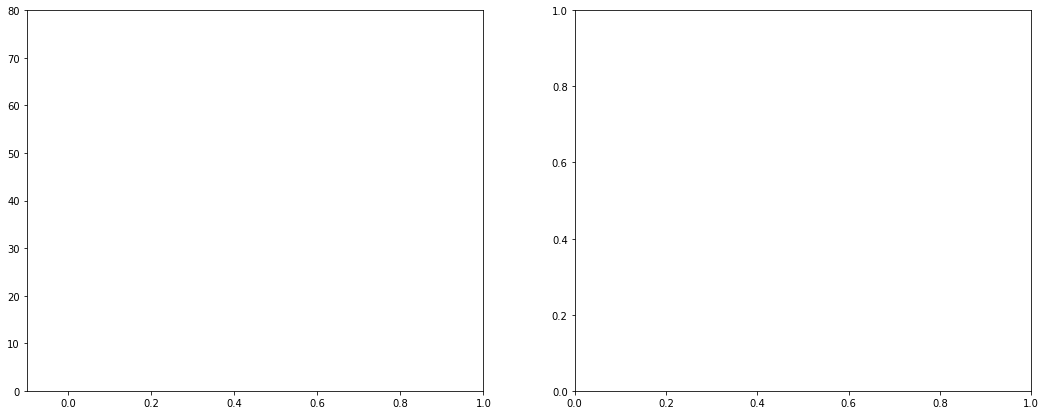

In [22]:
#Silhouette Analysis with Kmeans Clustering on the PCA transformed People Matrix
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(peopleMatrixPcaTransform) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(peopleMatrixPcaTransform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(peopleMatrixPcaTransform, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(peopleMatrixPcaTransform, cluster_labels)
    
    # The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
    # Scores around zero indicate overlapping clusters.
    # The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

    print("\n\n\nFor n_clusters =", n_clusters,
          "\n\nThe average silhouette_score is :", silhouette_avg,
          "\n\n* The silhouette score is bounded between -1 for incorrect clustering and +1 for highly dense clustering.",
          "\n* Scores around zero indicate overlapping clusters.",
          "\n* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster",
          "\n\nThe individual silhouette scores were :", sample_silhouette_values,
          "\n\nAnd their assigned clusters were :", cluster_labels,
          "\n\nWhich correspond to : 'Jane', 'Bob', 'Mary', 'Mike', 'Alice', 'Skip', 'Kira', 'Moe', 'Sara', and 'Tom'")
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.rainbow(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.9)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", fontsize=20)
    ax1.set_xlabel("The silhouette coefficient values", fontsize=20)
    ax1.set_ylabel("Cluster label", fontsize=20)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.yaxis.set_tick_params(labelsize=20)


    # 2nd Plot showing the actual clusters formed
    colors = cm.rainbow(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(peopleMatrixPcaTransform[:, 0], peopleMatrixPcaTransform[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=400, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=400, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.", fontsize=20)
    ax2.set_xlabel("Feature space for the 1st feature", fontsize=20)
    ax2.set_ylabel("Feature space for the 2nd feature", fontsize=20)

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=25, fontweight='bold')
        
    ax2.xaxis.set_tick_params(labelsize=20)
    ax2.yaxis.set_tick_params(labelsize=20)

plt.show()



The Calinski-Harabaz Index is used to measure better defined clusters.

The Calinski-Harabaz score is higher when clusters are dense and well separated.

The Calinski-Harabaz score for : 2  clusters is:  5.9287677531035134
The Calinski-Harabaz score for : 3  clusters is:  8.022388006716474
The Calinski-Harabaz score for : 4  clusters is:  8.517007828229978
The Calinski-Harabaz score for : 5  clusters is:  10.756543211425644
The Calinski-Harabaz score for : 6  clusters is:  16.844865468718357
The Davies-Bouldin Index is used to measure better defined clusters.

The Davies-Bouldin score is lower when clusters more separated (e.g. better partitioned.

Zero is the lowest possible Davies-Bouldin score.

The Davies-Bouldin score for : 2  clusters is:  1.0639301736299829
The Davies-Bouldin score for : 3  clusters is:  0.7201724801562887
The Davies-Bouldin score for : 4  clusters is:  0.6140206955266299
The Davies-Bouldin score for : 5  clusters is:  0.4190454030497494
The Davies-Bouldin score

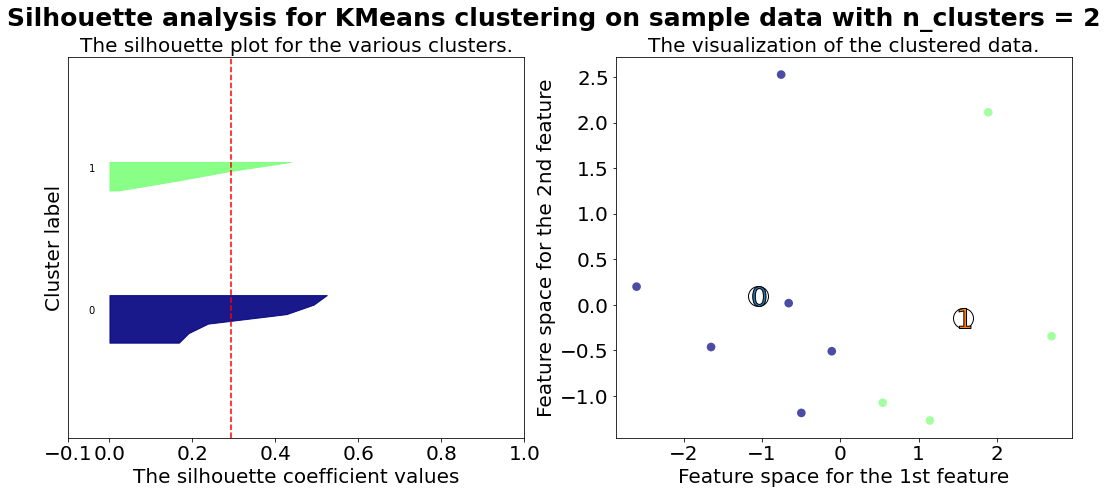

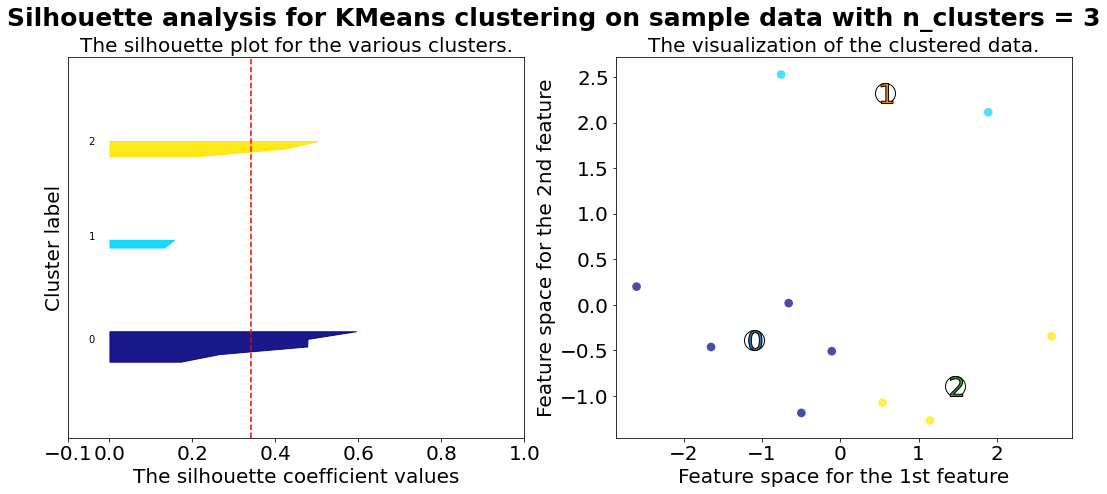

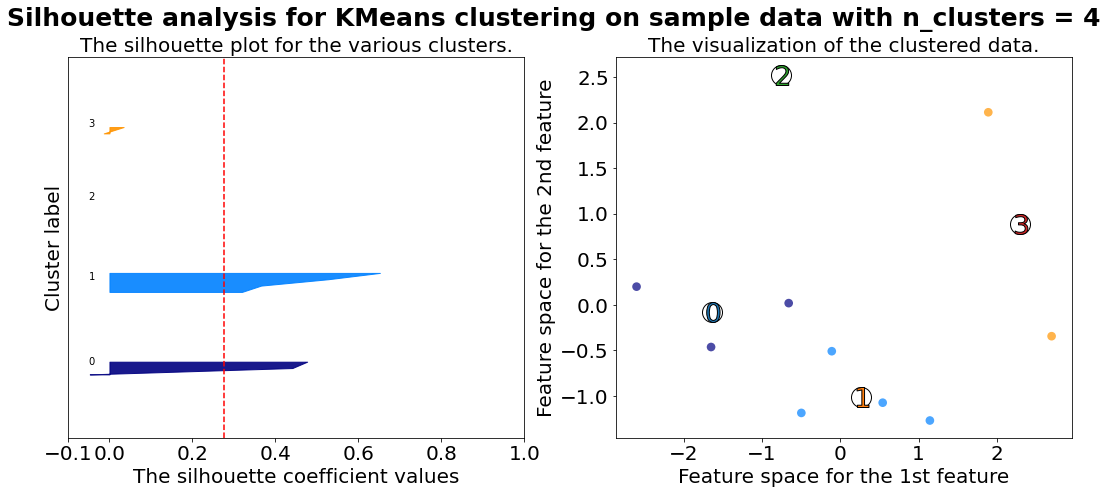

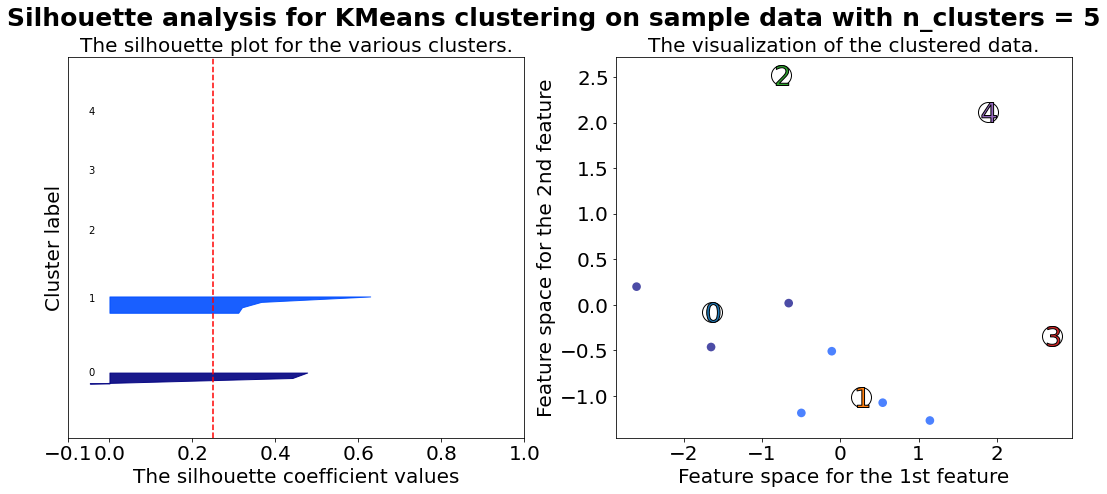

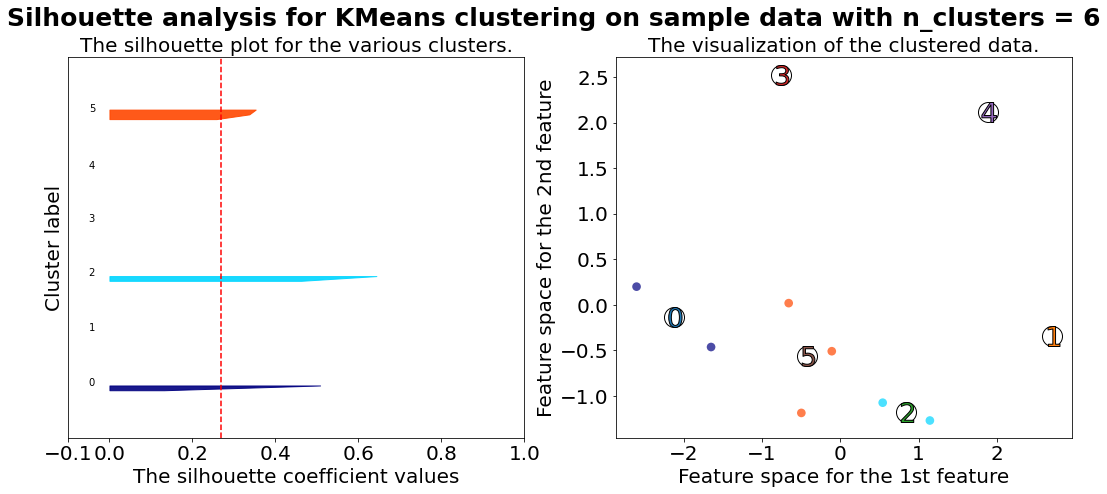

True

In [23]:
#Restaurant Clustering metrics

print("The Calinski-Harabaz Index is used to measure better defined clusters.")
print("\nThe Calinski-Harabaz score is higher when clusters are dense and well separated.\n")

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
     cluster_labels = clusterer.fit_predict(restaurantsMatrixPcaTransform)
     score = metrics.calinski_harabasz_score(restaurantsMatrixPcaTransform, cluster_labels)  
     print("The Calinski-Harabaz score for :", n_clusters, " clusters is: ", score)
     
     
     
print("The Davies-Bouldin Index is used to measure better defined clusters.")
print("\nThe Davies-Bouldin score is lower when clusters more separated (e.g. better partitioned.\n")
print("Zero is the lowest possible Davies-Bouldin score.\n")

import warnings
warnings.filterwarnings("ignore")

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
     cluster_labels = clusterer.fit_predict(restaurantsMatrixPcaTransform)
     score = metrics.davies_bouldin_score(restaurantsMatrixPcaTransform, cluster_labels)  
     print("The Davies-Bouldin score for :", n_clusters, " clusters is: ", score)




#Silhouette Analysis with Kmeans Clustering on the PCA transformed Restaurant Matrix
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(restaurantsMatrixPcaTransform) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(restaurantsMatrixPcaTransform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(restaurantsMatrixPcaTransform, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(restaurantsMatrixPcaTransform, cluster_labels)
    
    # The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
    # Scores around zero indicate overlapping clusters.
    # The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

    print("\n\n\nFor n_clusters =", n_clusters,
          "\n\nThe average silhouette_score is :", silhouette_avg,
          "\n\n* The silhouette score is bounded between -1 for incorrect clustering and +1 for highly dense clustering.",
          "\n* Scores around zero indicate overlapping clusters.",
          "\n* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster",
          "\n\nThe individual silhouette scores were :", sample_silhouette_values,
          "\n\nAnd their assigned clusters were :", cluster_labels,
          "\n\nWhich correspond to : 'Flacos', 'Joes', 'Poke', 'Sush-shi', 'Chick Fillet', 'Mackie Des', 'Michaels', 'Amaze', 'Kappa', and 'Mu'")
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.jet(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.9)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", fontsize=20)
    ax1.set_xlabel("The silhouette coefficient values", fontsize=20)
    ax1.set_ylabel("Cluster label", fontsize=20)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.yaxis.set_tick_params(labelsize=20)


    # 2nd Plot showing the actual clusters formed
    colors = cm.jet(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(restaurantsMatrixPcaTransform[:, 0], restaurantsMatrixPcaTransform[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=400, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=400, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.", fontsize=20)
    ax2.set_xlabel("Feature space for the 1st feature", fontsize=20)
    ax2.set_ylabel("Feature space for the 2nd feature", fontsize=20)

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=25, fontweight='bold')
        
    ax2.xaxis.set_tick_params(labelsize=20)
    ax2.yaxis.set_tick_params(labelsize=20)

plt.show()



### Trying to answer if we can find weights from rankings

# Tommorow you visit another team. You have the same restaurants and they told you their optimal ordering for restaurants.  Can you find their weight matrix?


results = np.matmul(restaurantsMatrix, newPeopleMatrix)

results                             



newPeopleMatrix.shape


# Say that rank 1 is best

#reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# Argsort returns the indices that would sort an array - https://stackoverflow.com/questions/17901218/numpy-argsort-what-is-it-doing
# By default, argsort is in ascending order, but below, we make it in descending order and then add 1 since ranks start at 1

# np.set_printoptions(threshold=np.nan)


sortedResults = results.argsort()[::-1]
sortedResults.shape


np.sort(results)

#https://en.wikipedia.org/wiki/Invertible_matrix
#if we know restaurantsMatrix and Results Matrix can we calculate peopleMatrix?
#If the matrix A is invertible, then the equation Ax=b has a unique solution, namely x=A−1b.
# If A is not invertible, there may be either zero or many solutions to your problem.

results


#Ax = b 
#b is results.
#x is people weights
#A is restaurantsMatrix
#if A was and n*n matrix
#then, x = A^-1*b

# pinv returns the inverse of your matrix when it is available and the pseduo inverse when it isn't
# http://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html

# The pseudo inverse of a matrix A, A^+ is the matrix that solves Ax=b
# if x is the solution, then A^+ is the matrix such that xbar = (A^+)(b)

restaurantsMatrix_inv = np.linalg.pinv(restaurantsMatrix)
peopleMatrix_test = np.matmul(restaurantsMatrix_inv, results)
peopleMatrix_test.shape
peopleMatrix_test = np.swapaxes(peopleMatrix_test,0,1)
peopleMatrix_test.shape

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html
#They are the same with a relative tolerance of 0.000000831529 
# and an absolute tolerance of 0.000000831529
np.allclose(peopleMatrix, peopleMatrix_test, rtol=1e-14, atol=1e-14, equal_nan=False)